# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$. 

**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.



*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

1. Пусть $x$ - новый объект, тогда $\widehat{Y}(x) = x^{T}\widehat{\theta}$, где $\widehat{\theta}$ - оценка $\theta$ - которую нам надо получить. Если $x^{T} \cdot x$ - невырожденная матрица, то $\widehat{\theta}$ можно получить по следующей формуле: 

$$\widehat{\theta} = (x^T x) ^ {-1} \cdot x^T \cdot Y = \frac{(x, Y)}{|x|^2} = \frac{\sum_{i=1}^{n} x_i \cdot Y_i}{\sum_{i=1}^{n} x_i^2} = \frac{\sum_{i=1}^{n} x_i \cdot (\theta x_i + \varepsilon_i)}{\sum_{i=1}^{n} x_i^2} =
\frac{\sum_{i=1}^{n} \theta x_i^2 + x_i \varepsilon_i}{\sum_{i=1}^{n} x_i^2} = \theta + \frac{\sum_{i=1}^{n} x_i \varepsilon_i}{\sum_{i=1}^{n} x_i^2}.$$


2. Для начала выразим формулу градиентного спуска через скорость обучения $\eta$ и квадратичную ошибку $L$ для нахождения оценки $\widehat{\theta}$:
$$ -\eta \nabla L= - \eta \nabla \sum_{i=1}^{n}(\widehat{y_i} - Y_i)^2 = - \eta \nabla \sum_{i=1}^{n}(\widehat{\theta} x_i - Y_i)^2 = - \eta \sum_{i=1}^{n} 2 (\widehat{\theta} x_i - Y_i) x_i$$

Теперь выразим формулу стахостического градиентного спуска для нахождения оценки $\widehat{\theta}$ при условии, что 
$$-\eta \nabla L_{st} = -\eta \nabla (\widehat{y}_k - y_k)^2 = -2 \eta(\widehat{\theta} x_k - y_k) x_k$$

В SGD батч на каждой итерации определяется случайным образом с помощью операции выбора случайного подмножества из общего набора данных. Математически это может быть записано как $B_k \subset D$, где $D$ — общий набор данных, $B_k$ — батч на $k$-й итерации.

3. Воспользуемся формулой из пункта 1: 
$$\mathbb{E}\widehat{\theta} = \mathbb{E} \biggl( \frac{(x, Y)}{|x|^2} \biggl) = \frac{\mathbb{E}(x, Y)}{|x|^2} = \mathbb{E} \frac{\sum_{i=1}^{n}(x_i, \theta x_i + \varepsilon_i)}{|x|^2} = \theta + \mathbb{E}\frac{\sum_{i=1}^{n}(x_i, \varepsilon_i)}{|x|^2} = \theta.$$

   Так как $\widehat{y}(x) = \widehat{\theta} x$:

$$\mathbb{E}\widehat{y} = \mathbb{E}\widehat{\theta} x = (\mathbb{E}\widehat{\theta})x = \theta x = y$$


4. $$\mathsf{D}\widehat{\theta} = \mathsf{D}(\theta + \sum^{n}_{i=1}\frac{x_i\varepsilon_i}{|x|^2}) = \frac{1}{|x|^4}\mathsf{D}(\sum^{n}_{i=1}(x_i\varepsilon_i)) + 2 \cdot \sum_{i=1}^n \sum_{j=1}^{n} cov(x_i\varepsilon_i, x_j\varepsilon_j)$$

Заметим, что ковариация независимых величин равна нулю:
$$\frac{1}{|x|^4}\mathsf{D}(\sum^{n}_{i=1}(x_i\varepsilon_i)) + 2 \cdot \sum_{i=1}^n \sum_{j=1}^{n} cov(x_i\varepsilon_i, x_j\varepsilon_j) = \frac{1}{|x|^4}\mathsf{D}(\sum^{n}_{i=1}(x_i\varepsilon_i)) = \frac{\sigma^2}{|x|^2}$$

Далее найдем $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$:
$$\mathsf{D}\widehat{y}(x) = \mathsf{D}(\widehat{\theta}x) = |x|^2 \mathsf{D}(\widehat{\theta}) = |x|^2 \frac{\sigma^2}{|x|^2} = \sigma^2$$


5. Дисперсии в пункте 4 конечны при условиях:


1.   Дисперсии случайных ошибок $\varepsilon_i$ конечны
2.   Матрица $X$ полного ранга и обратима, т.е. все столбцы линейно независимы.

Если матрица $X^T X$ близка к вырожденной, то значит некоторые столбцы матрицы $X$ линейно зависимы и система уравнений $X \theta = y$ имеет бесконечное количество решений. Это приводит к нестабильности оценок параметров $\theta$ и увеличению дисперсии предсказания модели. 

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

![bike2.jpg](attachment:bike2.jpg)

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
data = pd.read_csv('day.csv')
train, test = train_test_split(data, test_size=0.2)
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [5]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

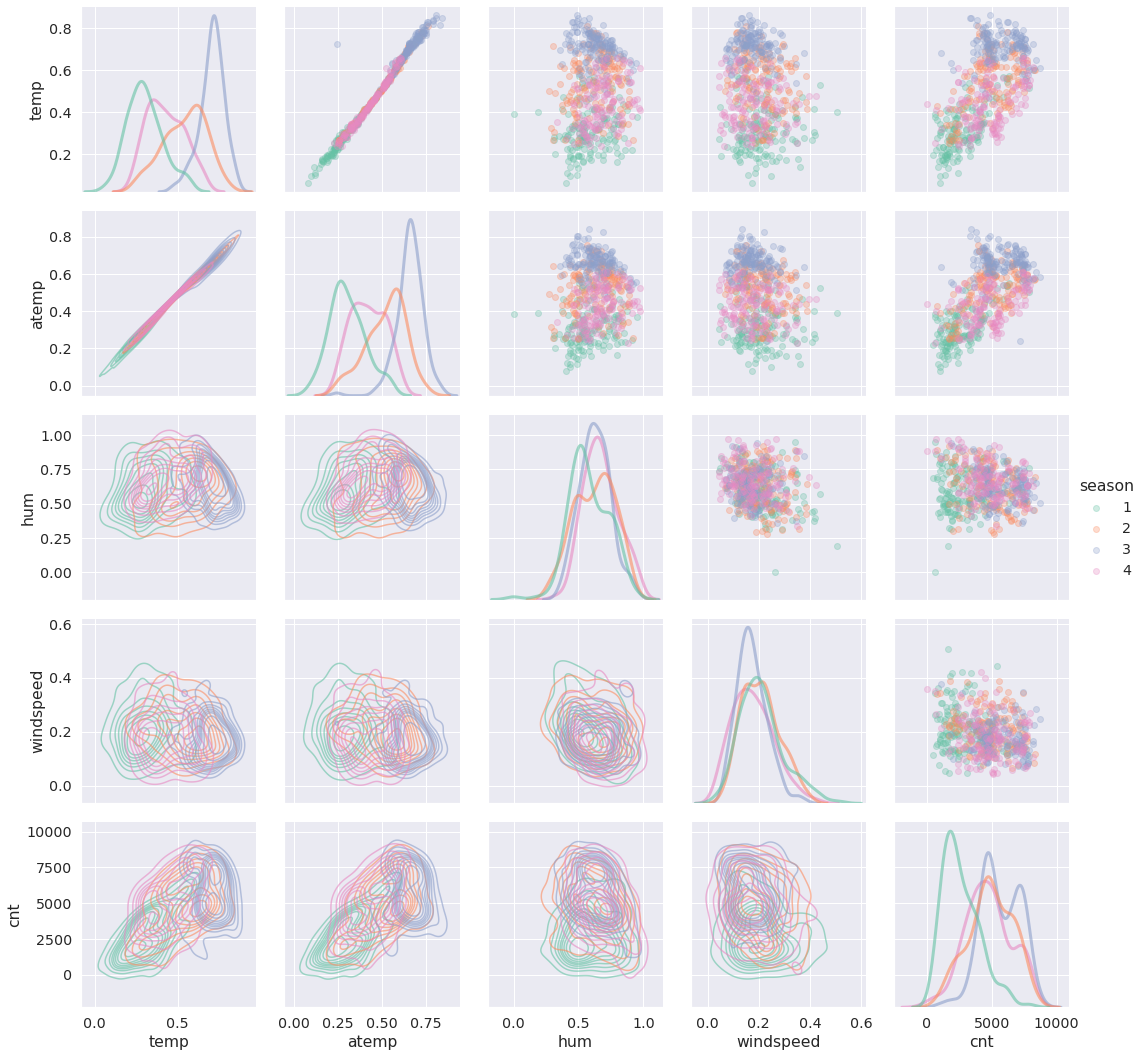

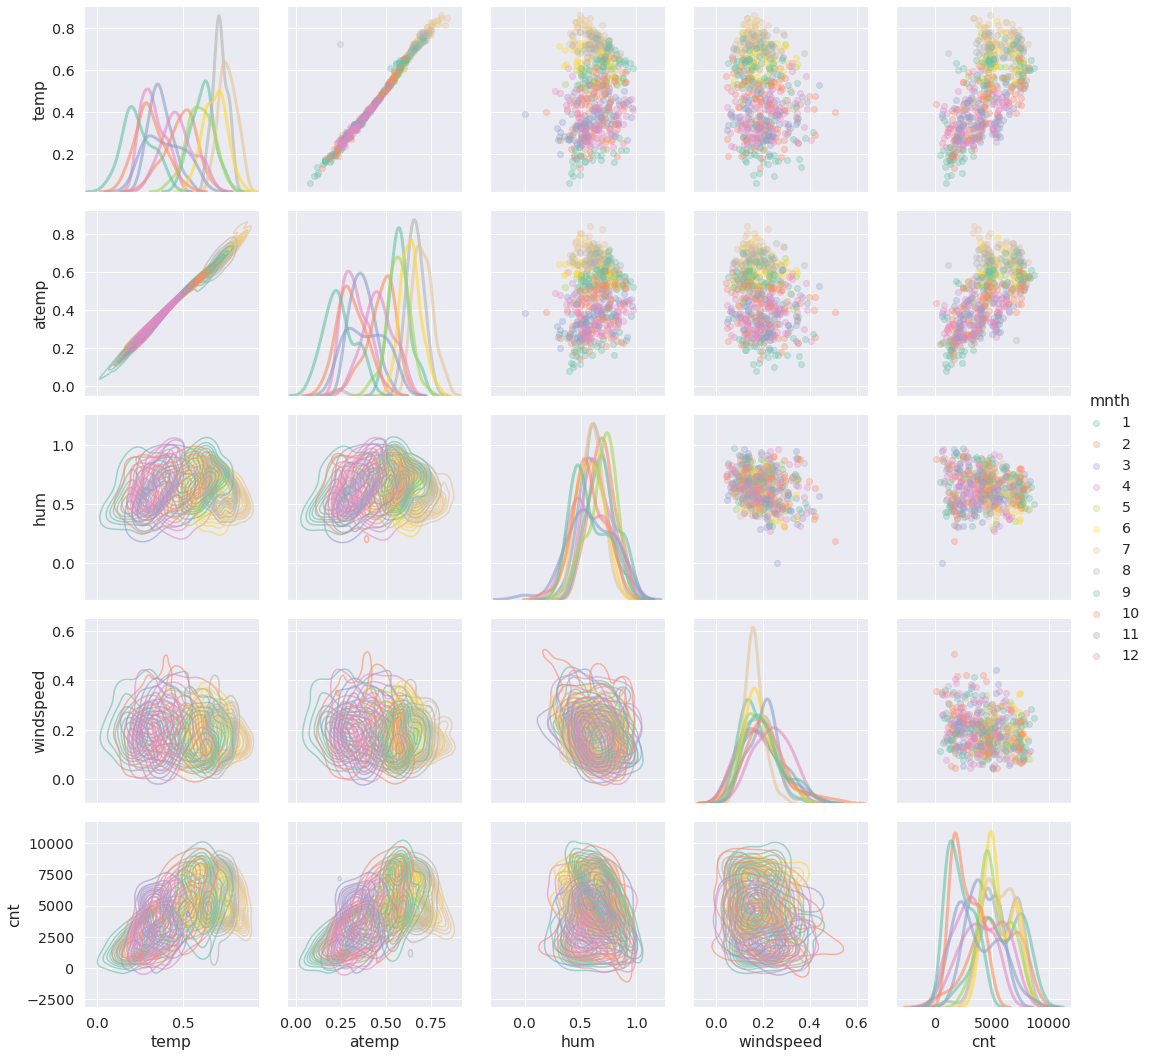

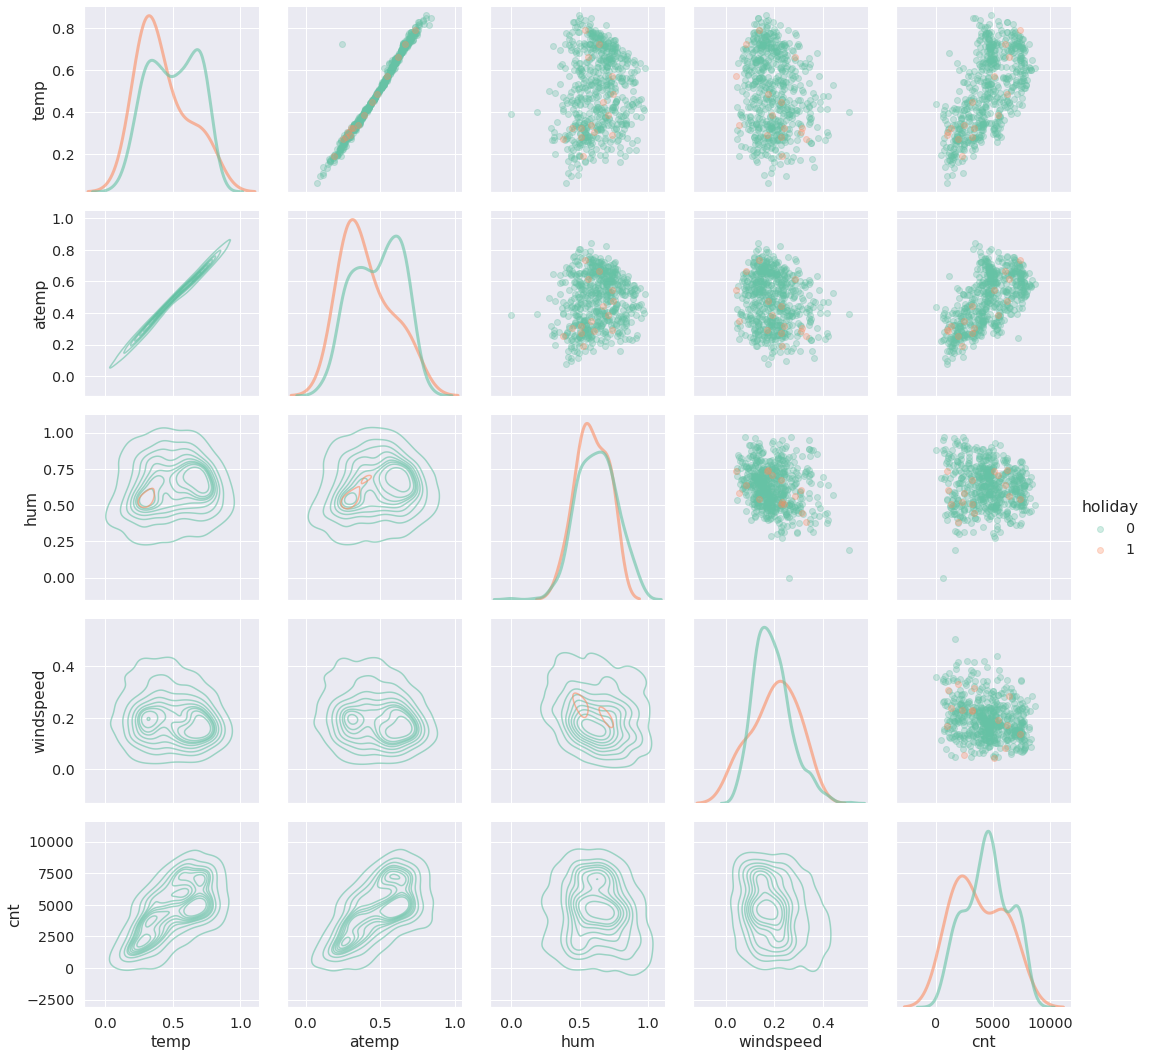

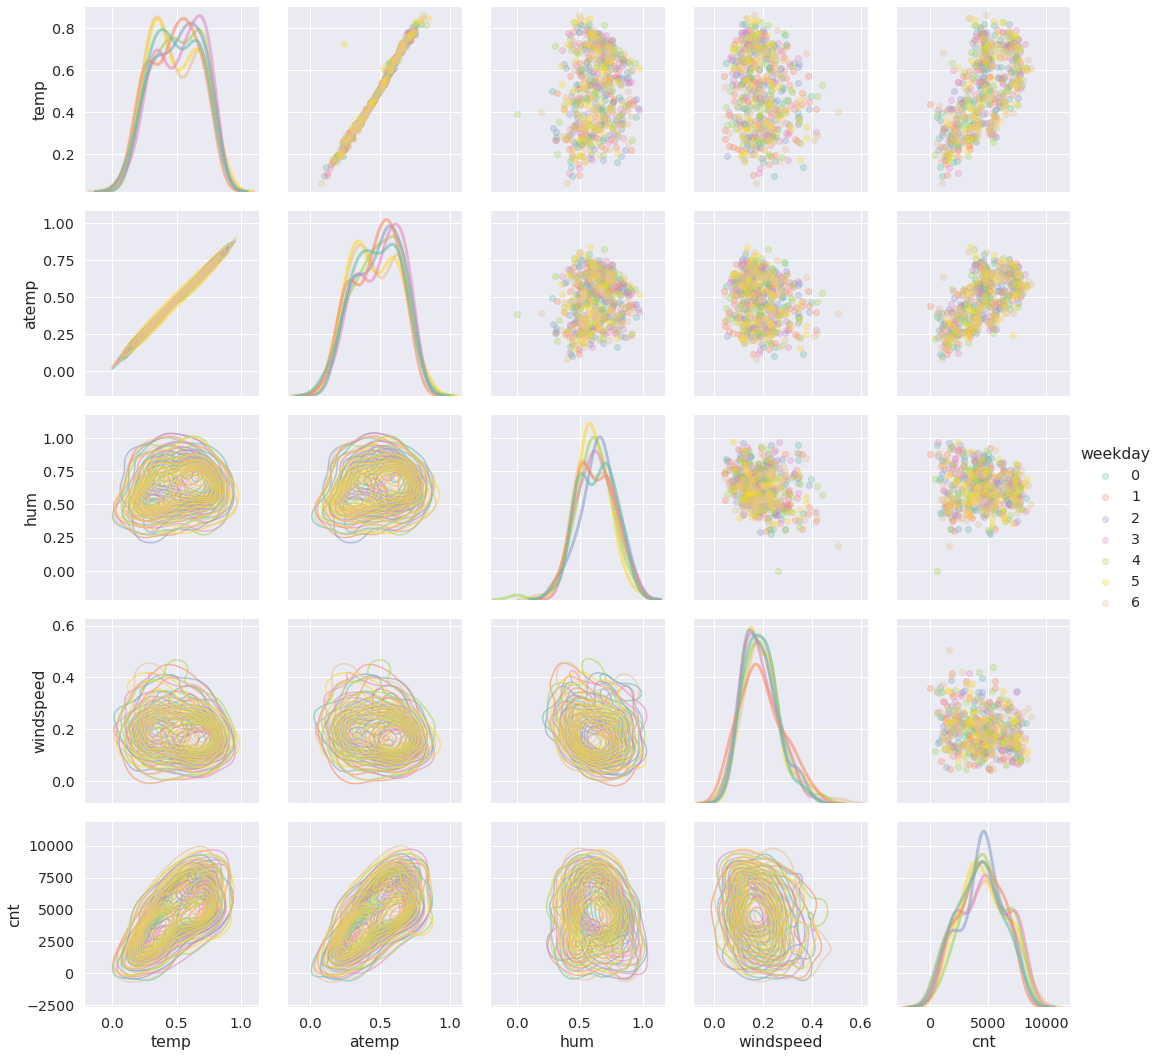

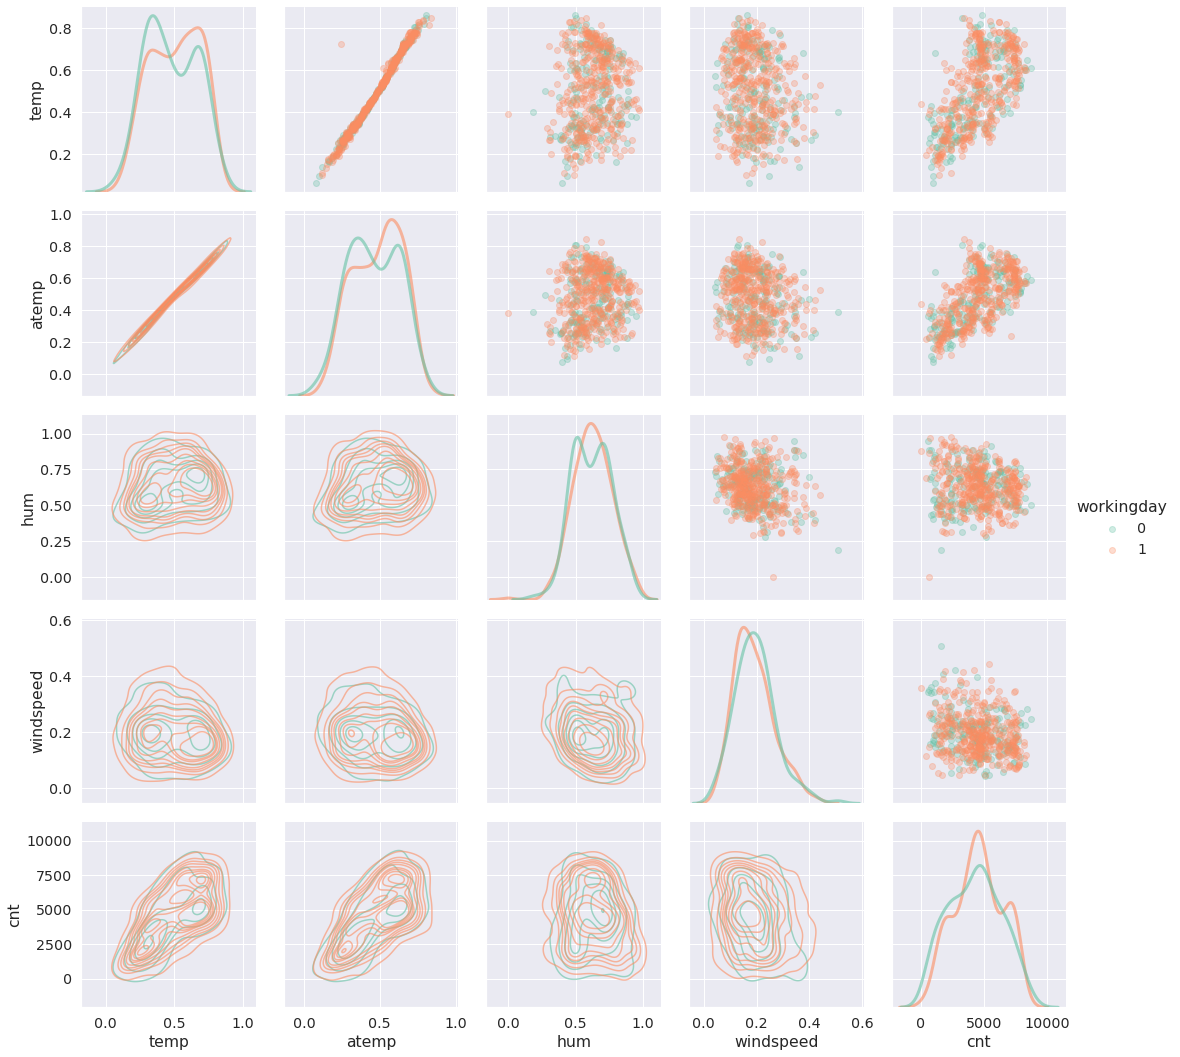

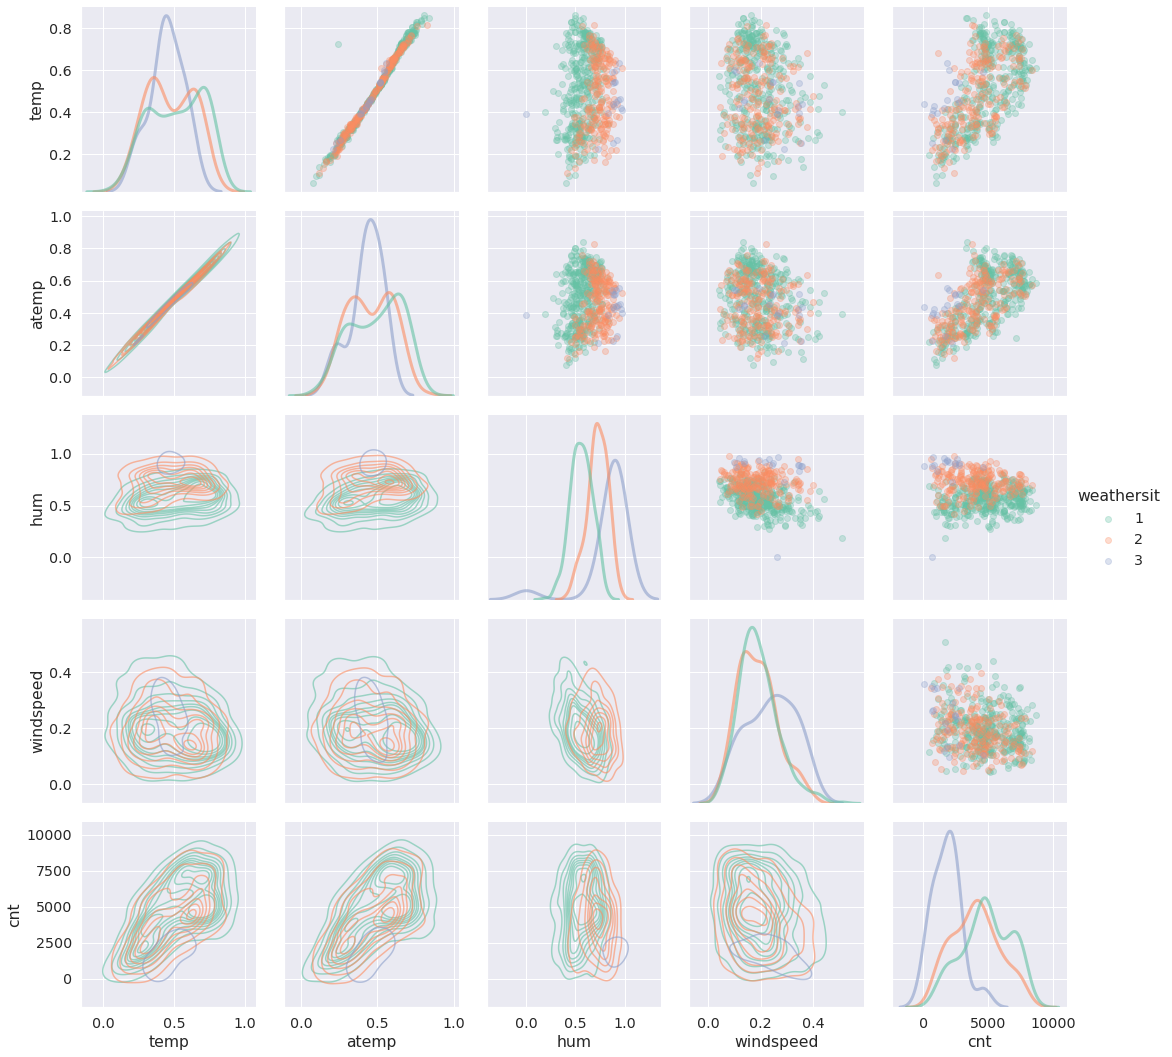

In [6]:
sns.set_style("darkgrid")
for hue in categorial_features:
    g = sns.PairGrid(train[real_features + [target_feature, ] + [hue, ]], hue=hue, palette='Set2', diag_sharey=False,
                     height=3)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)
    
    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**
В данных присутствует незначительное количество выбросов по категориальным признакам '`holiday`' и '`workingday`'. Это связано с тем, что рабочий или выходной день не так сильно влияет выбор велосипеда в качестве средства передвижения гораздо, как например температура воздуха или влажность (в этих категориальных признаках выбросы отсутсвуют.
В качестве функций от признаков помимо линейной стоит рассматривать $I\{x > c\}$, потому что например в категориальных признаках '`holiday`' или '`workingday`' без учета выбросов количество арендованных велосипедов имеет константную зависимость.

Также были обнаружены следующие зависимости: сильных колебаний спроса на прокат велосипедов в течение года нет и нет явных выбросов по месяцам, спрос на велосипеды в рабочие дни больше, чем праздники/выходные, наибольшее количество велосипедов арендуют в хорошую погоду, ощущаемая температура линейно зависит от фактической температуры в Цельсиях.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**a).** Избавимся от выбросов в вещественных признаках (в качестве метода интерполяции я использую `midpoint`, потому что он более устойчив к наличию выбросов данных, чем например `lower` или `linear`)

**б)** Применим к данным кодировку `OneHotEncoder`

Реализуйте данную процедуру.

**а)**

In [7]:
def remove_hue(target_df, feature):
    # IQR
    quartile_1 = np.percentile(target_df[feature], 25, interpolation='midpoint')
    quartile_2 = np.percentile(target_df[feature], 75, interpolation='midpoint')
    interquartile_range = quartile_2 - quartile_1

    # Выделение данных выше второго квантиля выборки
    upper = target_df[feature] >= (quartile_2 + 1.5 * interquartile_range)

    # Выделение данных ниже первого квантиля выборки
    lower = target_df[feature] <= (quartile_1 - 1.5 * interquartile_range)
    
    # Удаление выбросов (взятие данных между границами)
    target_df = target_df.loc[~(upper | lower)]

In [8]:
train.reset_index(inplace=True)
train.drop('index', axis=1, inplace=True)

for feature in real_features:
  remove_hue(train, feature)

<ipython-input-7-dc923fe6807c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  quartile_1 = np.percentile(target_df[feature], 25, interpolation='midpoint')
<ipython-input-7-dc923fe6807c>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  quartile_2 = np.percentile(target_df[feature], 75, interpolation='midpoint')


**б)**

In [9]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat]) # соединяем вещесвенные признаки и закодированные категориальные
X_train.shape

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(584, 28)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [10]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

Оценки коэффициентов перед признаками:

In [11]:
model.coef_

array([ 6385.15800729,   358.78134415, -2846.49218959, -3775.65670989,
        1034.73445023,  1008.25492562,  1710.72459673,    33.15791547,
         223.80315922,  -173.27958806,  -132.24174225,  -668.89766968,
       -1278.67050842,  -699.46234826,   230.15778643,    57.15482727,
        -397.93796903,  -268.18421328,   -13.47320221,   -67.64943864,
         -38.00984827,   149.92324335,   106.81989028,    69.33387326,
         370.44507352,   233.89092219,  -232.36120814, -2320.33269729])

Оценка свободного коэффициента

In [12]:
model.intercept_

2887.3918086135286

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [13]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

Выполним предсказание построенной ранее моделью с помощью метода `predict`

In [14]:
test_preds = model.predict(X_test)

Посчитаем ошибку предсказания на тестовой выборке по метрике RMSE

In [15]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1225.8911484381824

Посчитаем ошибку предсказания на тестовой выборке по метрике MAE

In [16]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1052.5553795132168

Посчитаем ошибку предсказания на тестовой выборке по метрике MAPE

In [17]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
mean_absolute_percentage_error(test[target_feature], test_preds)

31.437156281101498

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

В матрице признаки `'temp'` и `'atemp'` имеют линейную зависимость, поэтому при вычислении детерминанта обратной матрицы получается число, близкое к нулю. 

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Для решения проблемы из двух линейно зависимых признаков оставим лишь один.

In [18]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

Избавимся от выбросов:

In [19]:
train.reset_index(inplace=True)
train.drop('index', axis=1, inplace=True)

for feature in real_features:
  remove_hue(train, feature)

<ipython-input-7-dc923fe6807c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  quartile_1 = np.percentile(target_df[feature], 25, interpolation='midpoint')
<ipython-input-7-dc923fe6807c>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  quartile_2 = np.percentile(target_df[feature], 75, interpolation='midpoint')


In [20]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat]) # соединяем вещесвенные признаки и закодированные категориальные
X_train.shape

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(584, 27)

In [21]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

In [22]:
model.coef_

array([ 6716.75301462, -2828.32663498, -3429.52963099,  1013.55427747,
        1033.9625578 ,  1728.6963529 ,    43.99905989,   306.96884118,
         -54.2292406 ,   122.18066694,  -334.91141382,  -926.3605076 ,
        -305.83997869,   474.63586745,   159.09484515,  -378.34791563,
        -262.09344144,    54.57006041,   -76.32822376,   -33.06081246,
         171.10875069,   120.6212283 ,   116.15448139,   383.69188936,
         243.92536376,  -240.55023205, -2293.28604058])

In [23]:
model.intercept_

2771.399099305347

In [24]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

In [25]:
test_preds = model.predict(X_test)

In [26]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1225.5953915494872

In [27]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1059.2068703493244

In [28]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()
mean_absolute_percentage_error(test[target_feature], test_preds)

31.959158317770708

Сделайте выводы.

**Выводы:**
Мы избежали потенциальной ошибки выявив, что детерминант обратной матрицы с линейно зависимыми признаками может быть близок к нулю (если оценивать коэффициент по формуле из задания 1 пункт 1) и обнулять коэффициент. Но конкретно для наших данных исправление исходной матрицы признаков не оказало сильного влияния на результат.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

$$L = |Y - X \theta|^2 + \lambda |\theta^2| = \sum^N_{i=1}(y_i - x_i \theta) + \lambda \sum^K_{k=1}\theta_k^2 = (Y - X\theta)^T(Y - X\theta) + \lambda \theta^T \theta$$

$$\nabla L = - 2X^T(Y - X\theta) + 2\lambda \theta = 0$$

$$(X^TX + \lambda I)\theta = X^T Y$$

$$\widehat{\theta} = (X^TX + \lambda I)^{-1}X^T Y$$

Эта оценка для ridge-регрессионной модели дает более качественное приближение по сравнению с оценкой в методе наименьших квадратов, потому что как видно из последнего уравнения, мы увеличиваем значения матрицы $X^TX$ не меняя при этом ее собственные вектора. В результате получаем хорошо обусловленную матрицу.

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

Формула для *градиентного спуска:*
$$-\eta \nabla_{\theta} L = -\eta (- 2X^T(Y - X\theta) + 2\lambda \theta)$$

Формула для *стохастического градиентного спуска:*
$$-\eta \nabla_{\theta} L = -\eta (- 2\cdot batch_k^T\cdot(Y(batch_k) - batch_k \cdot \theta) + 2\lambda \theta)$$

В SGD батч на каждой итерации определяется случайным образом с помощью операции выбора случайного подмножества из общего набора данных. Математически это может быть записано как  Bk⊂D , где  D  — общий набор данных,  Bk  — батч на  k -й итерации.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

**Пояснение:**
Стандартизация признаков в модели Ridge регрессии используется для того, чтобы предотвратить смещение весов модели в пользу признаков с более высоким масштабом значений, чем у других признаков. Если признаки не стандартизированы, то при оптимизации функции потерь в модели Ridge регрессии, признаки с большими значениями будут иметь большие веса, чем признаки с меньшими значениями, несмотря на то, что они могут иметь одинаковый вклад в объяснении целевой переменной. Это может привести к переобучению модели.

Стандартизация признаков в модели Ridge регрессии решает эту проблему, путем приведения признаков к единому масштабу. Таким образом, все признаки будут иметь одинаковый диапазон значений, что позволяет модели взвешивать каждый признак равномерно при оптимизации функции потерь. Это помогает избежать переобучения и повысить обобщающую способность модели.


### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

![ubike.png](attachment:ubike.png)

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [36]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        n, d = X.shape
        X_copy = X
        if self.fit_intercept == True:
            X_copy = np.c_[X, np.ones((n, 1))]
            n, d = X_copy.shape
        self.theta = np.linalg.inv(X_copy.T @ X_copy + self.lambd * np.identity(d)) @ X_copy.T @ Y
        return self
  
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        n, d = X.shape
        X_copy = X
        if (self.fit_intercept == True):
            X_copy = np.c_[X, np.ones((n, 1))]
        predictions = X_copy @ self.theta
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [37]:
ridge_regression_data = pd.read_csv('day.csv')
train, other = train_test_split(ridge_regression_data, train_size=0.60)
validate, test = train_test_split(other, train_size=0.5)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

In [40]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

In [41]:
# избавимся от выбросов
train.reset_index(inplace=True)
train.drop('index', axis=1, inplace=True)

for feature in real_features:
  remove_hue(train, feature)

<ipython-input-7-dc923fe6807c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  quartile_1 = np.percentile(target_df[feature], 25, interpolation='midpoint')
<ipython-input-7-dc923fe6807c>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  quartile_2 = np.percentile(target_df[feature], 75, interpolation='midpoint')


In [44]:
# кодировка признаков
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat]) # соединяем вещесвенные признаки и закодированные категориальные

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
# Стандартизация обучающей выборки
scaler = StandardScaler()
sc_train = scaler.fit_transform(X_train)

In [46]:
validate_cat = encoder.transform(validate[categorial_features])
X_validate = np.hstack([validate_cat, validate[real_features]])
# Стандартизация валидационной выборки
sc_validate = scaler.transform(X_validate)

In [47]:
test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test_cat, test[real_features]])
# Стандартизация тестовой выборки
sc_test = scaler.transform(X_test)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [62]:
lambdas = np.logspace(-3, 3, num=100)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [63]:
RMSE_train_list = []
MAE_train_list = []
MAPE_train_list = []

for lambd in lambdas:
    model = RidgeRegression(lambd=lambd)  # объявляем модель
    model.fit(sc_train, train[target_feature])  # обучаем
    train_preds = model.predict(sc_train)

    RMSE_train_list.append(metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5)
    MAE_train_list.append(metrics.mean_absolute_error(train[target_feature], train_preds))
    MAPE_train_list.append(mean_absolute_percentage_error(train[target_feature], train_preds))

In [64]:
RMSE_validate_list = []
MAE_validate_list = []
MAPE_validate_list = []

for lambd in lambdas:
    model = RidgeRegression(lambd=lambd)  # объявляем модель
    model.fit(sc_train, train[target_feature])  # обучаем
    validate_preds = model.predict(sc_validate)

    RMSE_validate_list.append(metrics.mean_squared_error(validate[target_feature], validate_preds) ** 0.5)
    MAE_validate_list.append(metrics.mean_absolute_error(validate[target_feature], validate_preds))
    MAPE_validate_list.append(mean_absolute_percentage_error(validate[target_feature], validate_preds))

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

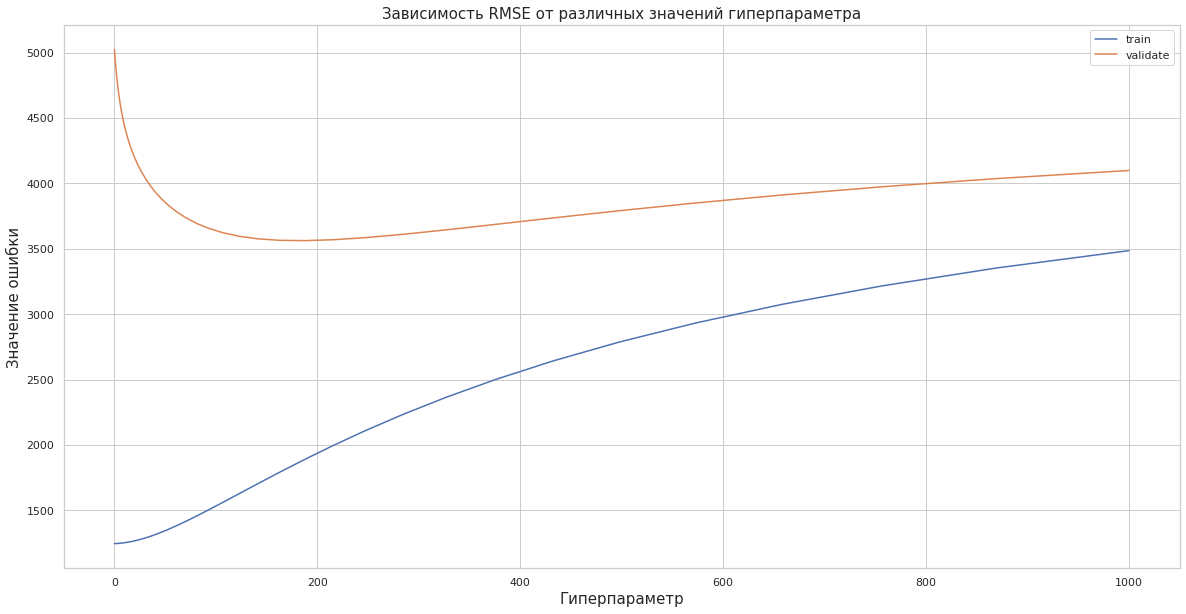

In [77]:
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x=lambdas, y=RMSE_train_list, label = 'train')
sns.lineplot(x=lambdas, y=RMSE_validate_list, label = 'validate')

plt.title('Зависимость RMSE от различных значений гиперпараметра', fontsize=15)
plt.xlabel('Гиперпараметр', fontsize=15)
plt.ylabel('Значение ошибки', fontsize=15)
plt.show()

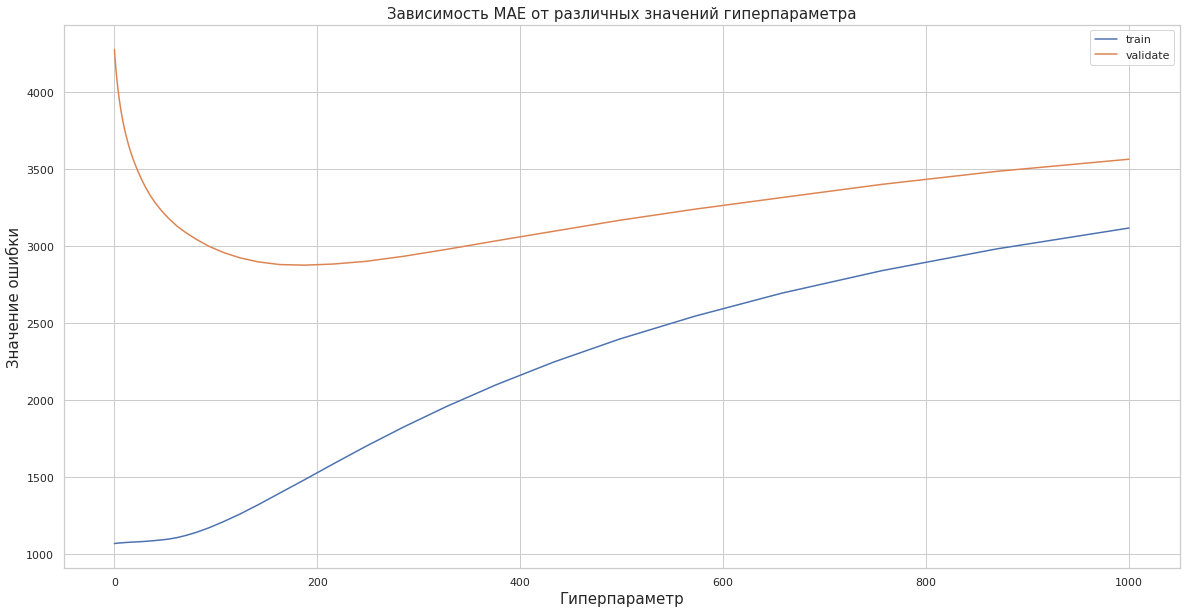

In [78]:
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x=lambdas, y=MAE_train_list, label = 'train')
sns.lineplot(x=lambdas, y=MAE_validate_list, label = 'validate')

plt.title('Зависимость MAE от различных значений гиперпараметра', fontsize=15)
plt.xlabel('Гиперпараметр', fontsize=15)
plt.ylabel('Значение ошибки', fontsize=15)
plt.show()

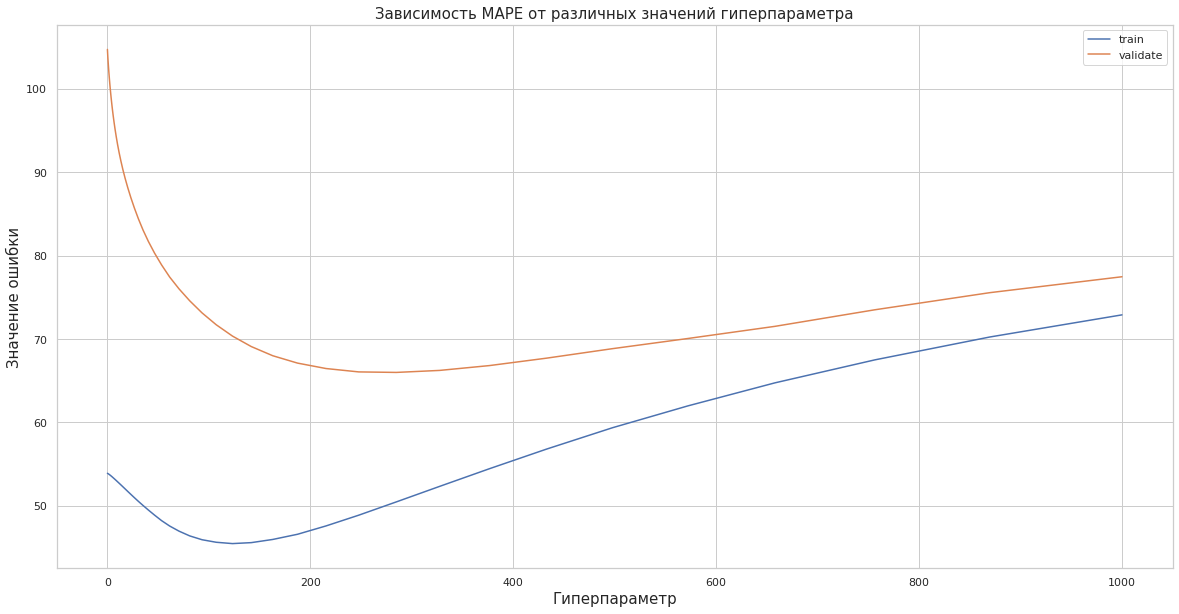

In [86]:
fig = plt.figure(figsize=(20, 10))
sns.lineplot(x=lambdas, y=MAPE_train_list, label = 'train')
sns.lineplot(x=lambdas, y=MAPE_validate_list, label = 'validate')

plt.title('Зависимость MAPE от различных значений гиперпараметра', fontsize=15)
plt.xlabel('Гиперпараметр', fontsize=15)
plt.ylabel('Значение ошибки', fontsize=15)
plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [81]:
thetas = []
for lambd in lambdas:
    model = RidgeRegression(lambd=lambd)  # объявляем модель
    model.fit(sc_train, train[target_feature])  # обучаем
    thetas.append(getattr(model, 'theta'))
thetas = np.asarray(thetas).T

Визуализация:

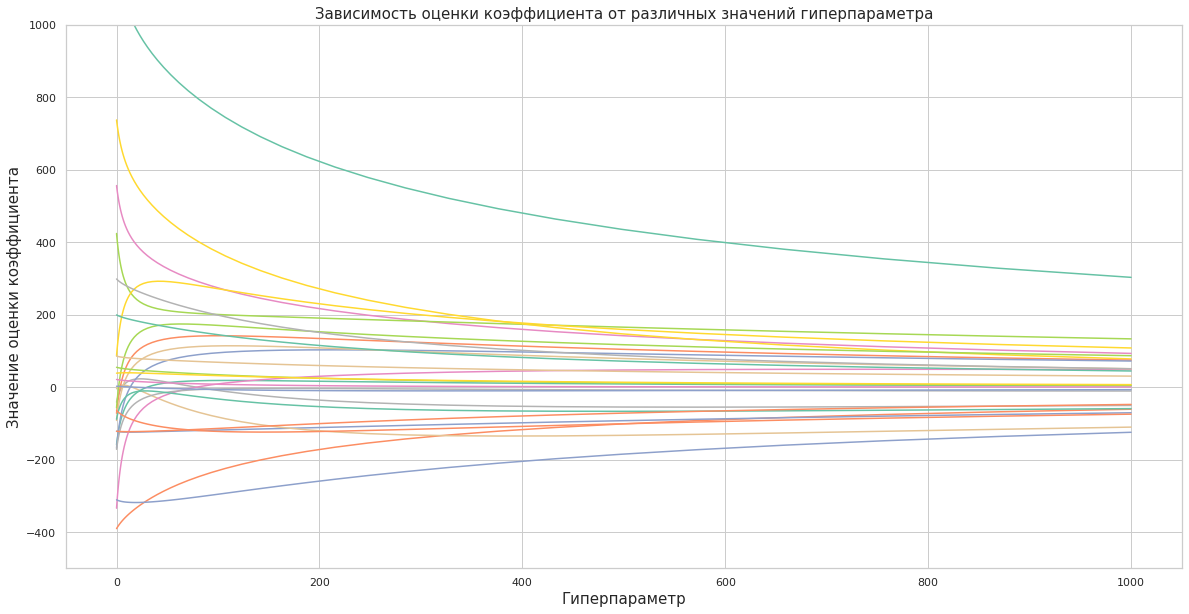

In [85]:
fig = plt.figure(figsize=(20, 10))
new_palette = sns.color_palette('Set2', len(thetas))
for i in range(len(thetas)):
    plt.plot(lambdas, thetas[i], color=new_palette[i], label=i)

plt.title('Зависимость оценки коэффициента от различных значений гиперпараметра', fontsize=15)
plt.xlabel('Гиперпараметр', fontsize=15)
plt.ylabel('Значение оценки коэффициента', fontsize=15)
plt.ylim(-500, 1000)
plt.show()

Наблюдаемая зависимость - при увеличении гиперпараметра значение оценки коэффициента стремится к нулю. 

Если значение оценки коэффициентов стремится к нулю при увеличении гиперпараметра, то можно сделать вывод о том, что модель все более рассчитывает на регуляризацию и становится более склонной к простой структуре модели, где веса признаков сильнее ограничены. Это может быть полезным для избежания переобучения модели, но может также привести к недостаточной гибкости модели при сложных задачах.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

В качестве значения гиперпараметра lambda выберу один из минимумов среди всех метрик - минимум на метрике MAE. Мой выбор обусловлен тем, что при выборе оптимального значения гиперпараметра необходимо учитывать баланс между смещением и разбросом модели. Меньшие значения lambda приводят к более сложным моделям с меньшим смещением и большим разбросом, а большие значения lambda приводят к более простым моделям с большим смещением и меньшим разбросом.

In [107]:
optimal = lambdas[MAE_validate_list.index(min(MAE_validate_list))]
optimal

187.3817422860383

In [108]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

sc_test = scaler.transform(X_test)

In [109]:
model = RidgeRegression(lambd=optimal)  # объявляем модель
model.fit(sc_train, train[target_feature])  # обучаем
test_preds = model.predict(sc_test)

Вычислим значения ошибок:

In [110]:
RMSE = metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5
RMSE

2046.0185065881808

In [111]:
MAE = metrics.mean_absolute_error(test[target_feature], test_preds)
MAE

1656.9114296296473

In [112]:
MAPE = mean_absolute_percentage_error(test[target_feature], test_preds)
MAPE

36.00666597928779

Сделайте выводы.

**Выводы**
Проведенные исследования показывают, что мы выбрали оптимальное значение гиперпараметра, которое позволило достичь небольших ошибок на тестовой выборке в сравнении с обучающей и валидационной выборками. В подтвержение графику метрика MAPE достигла низкого значения, что подтверждает, что модель успешно обучена.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

![bigdata.jpg](attachment:bigdata.jpg)

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.